# Libraries Import

In [2]:
%tensorflow_version 2.x
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

np.set_printoptions(precision=12, suppress=True, linewidth=150)
pd.options.display.float_format = '{:.6f}'.format
sns.set()
tf.__version__

'2.2.0'

# Loading data and initial exploration data 

In [3]:
(X_train, y_train), (X_test, y_test) = load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'X_train[0] shape: {X_train[0].shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
X_train[0] shape: (28, 28)


In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156

In [6]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

(-0.5, 27.5, 27.5, -0.5)

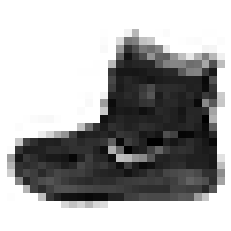

In [7]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

<function matplotlib.pyplot.show>

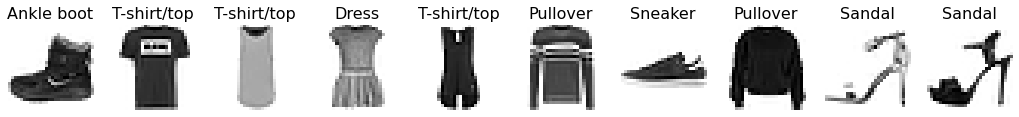

In [9]:
class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(18, 13))
for i in range(1, 11):
  plt.subplot(1, 10, i)
  plt.axis('off')
  plt.imshow(X_train[i-1], cmap='gray_r')
  plt.title(class_names[y_train[i-1]], color='black', fontsize=16)
plt.show

In [0]:
X_train = X_train / 255.
X_test = X_test / 255.

In [0]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test_cat =  to_categorical(y_test, num_classes=10)

# Build model

In [12]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(X_train, y_train, epochs=10, batch_size=10,
                    validation_split=0.2)

Epoch 1/10
4800/4800 [==============================] - 12s 3ms/step - loss: 0.5208 - accuracy: 0.8211 - val_loss: 0.4488 - val_accuracy: 0.8545
Epoch 2/10
4800/4800 [==============================] - 11s 2ms/step - loss: 0.4315 - accuracy: 0.8578 - val_loss: 0.4263 - val_accuracy: 0.8627
Epoch 3/10
4800/4800 [==============================] - 11s 2ms/step - loss: 0.4155 - accuracy: 0.8680 - val_loss: 0.5047 - val_accuracy: 0.8537
Epoch 4/10
4800/4800 [==============================] - 11s 2ms/step - loss: 0.4124 - accuracy: 0.8752 - val_loss: 0.5014 - val_accuracy: 0.8650
Epoch 5/10
4800/4800 [==============================] - 11s 2ms/step - loss: 0.4085 - accuracy: 0.8799 - val_loss: 0.5247 - val_accuracy: 0.8604
Epoch 6/10
4800/4800 [==============================] - 11s 2ms/step - loss: 0.4117 - accuracy: 0.8815 - val_loss: 0.5293 - val_accuracy: 0.8690
Epoch 7/10
4800/4800 [==============================] - 11s 2ms/step - loss: 0.4096 - accuracy: 0.8827 - val_loss: 0.5750 - val_ac

In [14]:
metrics = pd.DataFrame(history.history)
metrics['epoch']=history.epoch
metrics

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.520787,0.821125,0.448759,0.854500,0
1,0.431523,0.857813,0.426291,0.862667,1
2,0.415521,0.867958,0.504681,0.853667,2
3,0.412394,0.875167,0.501378,0.865000,3
4,0.408494,0.879875,0.524727,0.860417,4
5,0.411750,0.881542,0.529260,0.869000,5
6,0.409633,0.882708,0.574996,0.863167,6
7,0.412452,0.884958,0.563459,0.866000,7
8,0.402924,0.889083,0.598637,0.866417,8
9,0.404133,0.889521,0.557727,0.871417,9


# Model assessment

In [16]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['accuracy'],
                         name='accuracy'),row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['loss'],name='loss'
              ),row=1, col=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_accuracy'],
                         name='val_accuracy'),row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_loss'],
                         name='val_loss'),row=1, col=2)

fig.update_xaxes(title_text='epochs')
fig.update_yaxes(title_text='accuracy')
fig.update_layout(width=1000, title='Accuracy and Loss')
fig.show()

In [17]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(test_acc)

0.8608999848365784


# Prediction based on the model


In [19]:
predictions = model.predict(X_test)
predictions

array([[0.000000000001, 0.            , 0.            , ..., 0.00001778213 , 0.000000020729, 0.99995065    ],
       [0.00000000319 , 0.            , 0.9999995     , ..., 0.            , 0.            , 0.            ],
       [0.            , 1.            , 0.            , ..., 0.            , 0.            , 0.            ],
       ...,
       [0.000000002102, 0.            , 0.000000000006, ..., 0.            , 1.            , 0.000000000032],
       [0.            , 1.            , 0.            , ..., 0.            , 0.            , 0.            ],
       [0.000000010594, 0.000000000583, 0.00000000581 , ..., 0.15919097    , 0.045416173   , 0.002819415   ]], dtype=float32)

In [20]:
predictions_df = pd.DataFrame(predictions)
predictions_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000032,0.000000,0.000018,0.000000,0.999951
1,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.787943,0.000000,0.000659,0.000177,0.000003,0.000000,0.211107,0.000111,0.000000,0.000000


In [22]:
predictions_cls = model.predict_classes(X_test)
predictions_cls

array([9, 2, 1, ..., 8, 1, 5])

# Prediction exploration

In [26]:
#@title Select photo index:
idx = 6077 #@param {type: 'slider', min:0, max:10000}

if predictions_cls[idx] == y_test[idx]:
  color = 'green'
else:
  color = 'red'

fig = go.Figure()
fig.add_trace(go.Bar(x=class_names, y = predictions_df.iloc[idx], 
                     orientation='v', marker_color = color))
fig.update_layout(width=650, height=400,
                  title=f'Prediction: {class_names[predictions_cls[idx]]}')
fig.show()

from PIL import Image, ImageOps
import numpy as np

data = (X_test[idx]*255).astype(np.uint8)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png', width=300)


# Mis-classified images

In [39]:
#@title Select image index:
misclassified = []
for idx, _ in enumerate(X_test):
    if predictions_cls[idx] != y_test[idx]:
        misclassified.append(idx)

index_mapper = {}


for idx, idx_real in enumerate(misclassified):
    index_mapper[idx] = idx_real

idx = 255 #@param {type: 'slider', min:0, max:1119}

fig = go.Figure()
fig.add_trace(go.Bar(x=class_names, 
                     y=predictions_df.iloc[index_mapper[idx]], 
                     orientation='v', 
                     marker_color='red'))

fig.update_layout(width=600, height=300,
                  title=(f' Label: {class_names[y_test[index_mapper[idx]]]}'
                      f' ~ Prediction: {class_names[predictions_cls[index_mapper[idx]]]}'))
fig.show()

from PIL import Image, ImageOps
import numpy as np

data = (X_test[index_mapper[idx]] * 255).astype(np.uint8)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png', width=200)